   SquareFootage  Bedrooms  Bathrooms  LotSize  YearBuilt  LocationScore  \
0           1660         4          1     0.65       1999              2   
1           4572         3          1     1.64       1959              1   
2           3892         1          3     1.39       1954              3   
3           1266         3          2     0.37       1972              2   
4           4244         1          2     1.83       1959              2   

    Price  
0  392703  
1  254615  
2  526657  
3  616074  
4  800294  
📉 Mean Absolute Error (MAE): 273959.16
📉 Mean Squared Error (MSE): 94613581122.48
📉 Root Mean Squared Error (RMSE): 307593.21
📈 R² Score: -0.0633


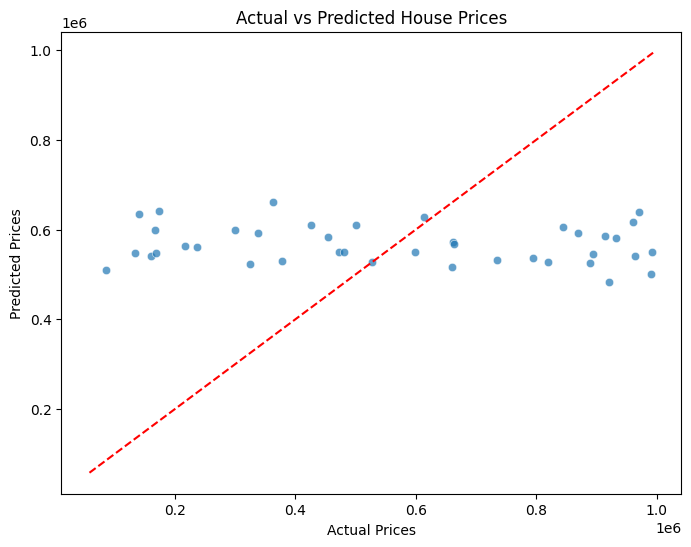

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📌 Load the dataset
file_path = "house_prices_extended.csv"  
df = pd.read_csv(file_path)

# 🔍 Inspect the dataset
print(df.head())

# 📌 Define features (X) and target variable (y)
X = df.drop(columns=["Price"])  # Independent variables
y = df["Price"]  # Dependent variable

# 🔹 Identify numerical and categorical features
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# 🔧 Preprocessing: Scaling numeric data & Encoding categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# 🚀 Create pipeline with preprocessing and regression model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# 🔀 Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train the model
model.fit(X_train, y_train)

# 🎯 Make predictions
y_pred = model.predict(X_test)

# 📊 Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📈 R² Score: {r2:.4f}")

# 🔍 Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
